A quick example of how to explore the transpiration files. These files are contained in a [netcdf](https://www.unidata.ucar.edu/software/netcdf/software.html) file format with three dimensions:

- site: Each site is referenced by it's site code (e.g. the Harvard Forest EMS Tower is US-Ha1)
- year: The year from 1991 to 2015
- doy:  Day of year, ranging from 1 to 366

For example, to get the data from the Harvard Forest EMS Tower site on July 20, it would be index site=213, year=14, doy=200.

However, it is much easier to explore the data using the xarray package. The following steps will:

1. download the data
2. rebuild the time dimension to be a datetime
3. output single sites to .csv format

# Downloading the data

Here, the data will be downloaded directly from [the Zenodo repository](https://zenodo.org/record/3978408#.Xz0Yj0vVJ_U). The data file is the daily data from all sites. Note that there is also a site integrated data file in the repository with a similar format.

The data can also be manually downloaded and opened with:


```
xr.open_dataset("path/to/file/daily.nc")
```

In [1]:
import xarray as xr
import numpy as np
import os

#### this part downloads the data
import netCDF4
import requests

r = requests.get("https://zenodo.org/record/3978408/files/daily.nc?download=1")
nc4_ds = netCDF4.Dataset('name', mode = 'r', memory=r.content)
store = xr.backends.NetCDF4DataStore(nc4_ds)
ds = xr.open_dataset(store)
ds
###

### if the data is already downloaded, you can just run:
# xr.open_dataset("path/to/file/daily.nc")

<xarray.Dataset>
Dimensions:        (doy: 366, site: 276, year: 25)
Coordinates:
  * site           (site) object 'AR-SLu' 'AR-Vir' ... 'ZA-Kru' 'ZM-Mon'
  * year           (year) int64 1991 1992 1993 1994 1995 ... 2012 2013 2014 2015
    latitude       (site) float64 ...
    longitude      (site) float64 ...
  * doy            (doy) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    TEA_T          (site, year, doy) float64 ...
    uWUE_T         (site, year, doy) float64 ...
    ET             (site, year, doy) float64 ...
    PerezPriego_T  (site, year, doy) float64 ...
Attributes:
    description:  Transpiration estiamtes using three different methods. See ...
    author:       Jacob A. Nelson
    email:        jnelson@bgc-jena.mpg.de
    date:         Aug 10, 2020

# Rebuild the time dimension

In case you would like the data to have a standard timestamp format rather than year/doy. The new dimensions will then be [site, time]

In [2]:
ds = ds.stack(time=['year', 'doy'])

ds = ds.assign_coords( 
    time=np.array([np.datetime64("{0}-01-01".format(ds.time.coords['year'].values[i]), 'Y') + np.timedelta64(ds.time.coords['doy'].values[i]-1, 'D') for i in range(ds.time.size)])
)

ds

<xarray.Dataset>
Dimensions:        (site: 276, time: 9150)
Coordinates:
  * site           (site) object 'AR-SLu' 'AR-Vir' ... 'ZA-Kru' 'ZM-Mon'
    latitude       (site) float64 -33.46 -28.24 47.12 ... -15.44 -25.02 -15.44
    longitude      (site) float64 -66.46 -56.19 11.32 133.2 ... 167.2 31.5 23.25
  * time           (time) datetime64[ns] 1991-01-01 1991-01-02 ... 2016-01-01
Data variables:
    TEA_T          (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    uWUE_T         (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    ET             (site, time) float64 nan nan nan nan nan ... nan nan nan nan
    PerezPriego_T  (site, time) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    description:  Transpiration estiamtes using three different methods. See ...
    author:       Jacob A. Nelson
    email:        jnelson@bgc-jena.mpg.de
    date:         Aug 10, 2020

The data can now be plotted with xarray's conveninect plotting functions. Here, we plot all the variables.

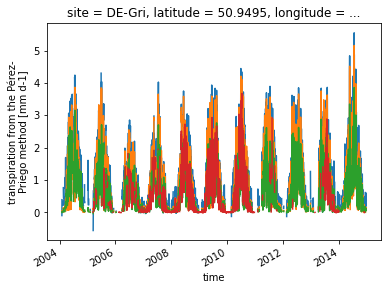

In [3]:
site = 'DE-Gri'
ds.sel(site=site).ET.plot()
ds.sel(site=site).TEA_T.plot()
ds.sel(site=site).uWUE_T.plot()
ds.sel(site=site).PerezPriego_T.plot()

For the next step, we will select the which sites to export. All sites available can be seen in the following list:

In [4]:
ds.site.values.tolist()

['AR-SLu',
 'AR-Vir',
 'AT-Neu',
 'AU-ASM',
 'AU-Cpr',
 'AU-Cum',
 'AU-DaP',
 'AU-DaS',
 'AU-Dry',
 'AU-Emr',
 'AU-GWW',
 'AU-Gin',
 'AU-How',
 'AU-Lox',
 'AU-RDF',
 'AU-Rig',
 'AU-Rob',
 'AU-Stp',
 'AU-TTE',
 'AU-Tum',
 'AU-Wac',
 'AU-Wom',
 'AU-Ync',
 'BE-Bra',
 'BE-Lon',
 'BE-Vie',
 'BR-Ma2',
 'BR-Sa3',
 'BR-Sp1',
 'BW-Ma1',
 'CA-Ca1',
 'CA-Ca2',
 'CA-Gro',
 'CA-Let',
 'CA-Man',
 'CA-Mer',
 'CA-NS1',
 'CA-NS2',
 'CA-NS3',
 'CA-NS4',
 'CA-NS5',
 'CA-NS6',
 'CA-NS7',
 'CA-Oas',
 'CA-Obs',
 'CA-Ojp',
 'CA-Qcu',
 'CA-Qfo',
 'CA-SF1',
 'CA-SF2',
 'CA-SF3',
 'CA-SJ1',
 'CA-SJ2',
 'CA-TP1',
 'CA-TP2',
 'CA-TP3',
 'CA-TP4',
 'CA-TPD',
 'CA-WP1',
 'CG-Tch',
 'CH-Cha',
 'CH-Dav',
 'CH-Fru',
 'CH-Lae',
 'CH-Oe1',
 'CH-Oe2',
 'CN-Cha',
 'CN-Cng',
 'CN-Dan',
 'CN-Din',
 'CN-Du2',
 'CN-Du3',
 'CN-Ha2',
 'CN-HaM',
 'CN-Qia',
 'CN-Sw2',
 'CZ-BK1',
 'CZ-BK2',
 'CZ-wet',
 'DE-Akm',
 'DE-Bay',
 'DE-Geb',
 'DE-Gri',
 'DE-Hai',
 'DE-Har',
 'DE-Kli',
 'DE-Lkb',
 'DE-Lnf',
 'DE-Meh',
 'DE-Obe',
 'DE-RuR',

In [5]:
#### This line would export all 276 sites
#sites = ds.site.values


### Select sites you would like to export
sites = ['DE-Hai', 'FR-Pue', 'FI-Hyy']


### Select where the data should go. This will be a folder.
output_dir = "data/"

if not os.path.isdir(output_dir):
    os.makedirs(output_dir)

### Here the data is exported as a csv for each site.
for site in sites:
    ds.sel(site=site).to_dataframe().to_csv(os.path.join(output_dir, site+'.csv'))
